# Gaussian Distribution Function

### By Rodrigo Guarneros

This function is created based on an Oriented Object Programming approach.

This is a class element where you can find attribues and methods such as: 

- mean, stdev and data
- read_data_file, calculate_mean, plot_histogram, probability calculation (pdf) and plot_histogram_pdf 

In [2]:
#Dependencies
import math
import matplotlib.pyplot as plt

In [69]:
import math
import matplotlib.pyplot as plt

class Gaussian():
    """ Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu = 0, sigma = 1):
        
        self.mean = mu
        self.stdev = sigma
        self.data = []

    
    def calculate_mean(self):
    
        """Function to calculate the mean of the data set.
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set
    
        """
                    
        avg = 1.0 * sum(self.data) / len(self.data)
        
        self.mean = avg
        
        return self.mean



    def calculate_stdev(self, sample=True):

        """Function to calculate the standard deviation of the data set.
        
        Args: 
            sample (bool): whether the data represents a sample or population
        
        Returns: 
            float: standard deviation of the data set
    
        """

        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
    
        mean = self.mean
    
        sigma = 0
    
        for d in self.data:
            sigma += (d - mean) ** 2
        
        sigma = math.sqrt(sigma / n)
    
        self.stdev = sigma
        
        return self.stdev
        

    def read_data_file(self, file_name, sample=True):
    
        """Function to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute. 
        After reading in the file, the mean and standard deviation are calculated
                
        Args:
            file_name (string): name of a file to read from
        
        Returns:
            None
        
        """
            
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
    
        self.data = data_list
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev(sample)
        
        
    def plot_histogram(self):
        """Function to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
        plt.hist(self.data)
        plt.title('Histogram of Data')
        plt.xlabel('data')
        plt.ylabel('count')
        
        
        
    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            x (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
        
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
        

    def plot_histogram_pdf(self, n_spaces = 50):

        """Function to plot the normalized histogram of the data and a plot of the 
        probability density function along the same range
        
        Args:
            n_spaces (int): number of data points 
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
        
        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
         # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True, figsize=(80,80), linewidth=9.0)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data', fontsize=100)
        axes[0].set_ylabel('Density', fontsize=80)

        axes[1].plot(x, y, linewidth=9.0)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation', fontsize=100)
        axes[0].set_ylabel('Density', fontsize=80)
        
        plt.savefig('distribution2.png')
        plt.show()
        

        return x, y
        

In [70]:
# Unit tests to check your solution

import unittest

class TestGaussianClass(unittest.TestCase):
    def setUp(self):
        self.gaussian = Gaussian(25, 2)

    def test_initialization(self): 
        self.assertEqual(self.gaussian.mean, 25, 'incorrect mean')
        self.assertEqual(self.gaussian.stdev, 2, 'incorrect standard deviation')

    def test_pdf(self):
        self.assertEqual(round(self.gaussian.pdf(25), 5), 0.19947,\
         'pdf function does not give expected result') 

    def test_meancalculation(self):
        self.gaussian.read_data_file('resources/numbers.txt', True)
        self.assertEqual(self.gaussian.calculate_mean(),\
         sum(self.gaussian.data) / float(len(self.gaussian.data)), 'calculated mean not as expected')

    def test_stdevcalculation(self):
        self.gaussian.read_data_file('resources/numbers.txt', True)
        self.assertEqual(round(self.gaussian.stdev, 2), 35.27, 'sample standard deviation incorrect')
        self.gaussian.read_data_file('resources/numbers.txt', False)
        self.assertEqual(round(self.gaussian.stdev, 2), 34.53, 'population standard deviation incorrect')
                
tests = TestGaussianClass()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

....
----------------------------------------------------------------------
Ran 4 tests in 0.008s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [71]:
gaussian_one = Gaussian()
gaussian_one.read_data_file("resources/numbers.txt")

In [72]:
print(gaussian_one.mean)
print(gaussian_one.stdev)

22.75
35.26822686338167


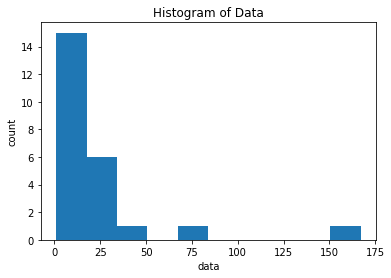

In [73]:
gaussian_one.plot_histogram()

AttributeError: 'str' object has no attribute 'spines'

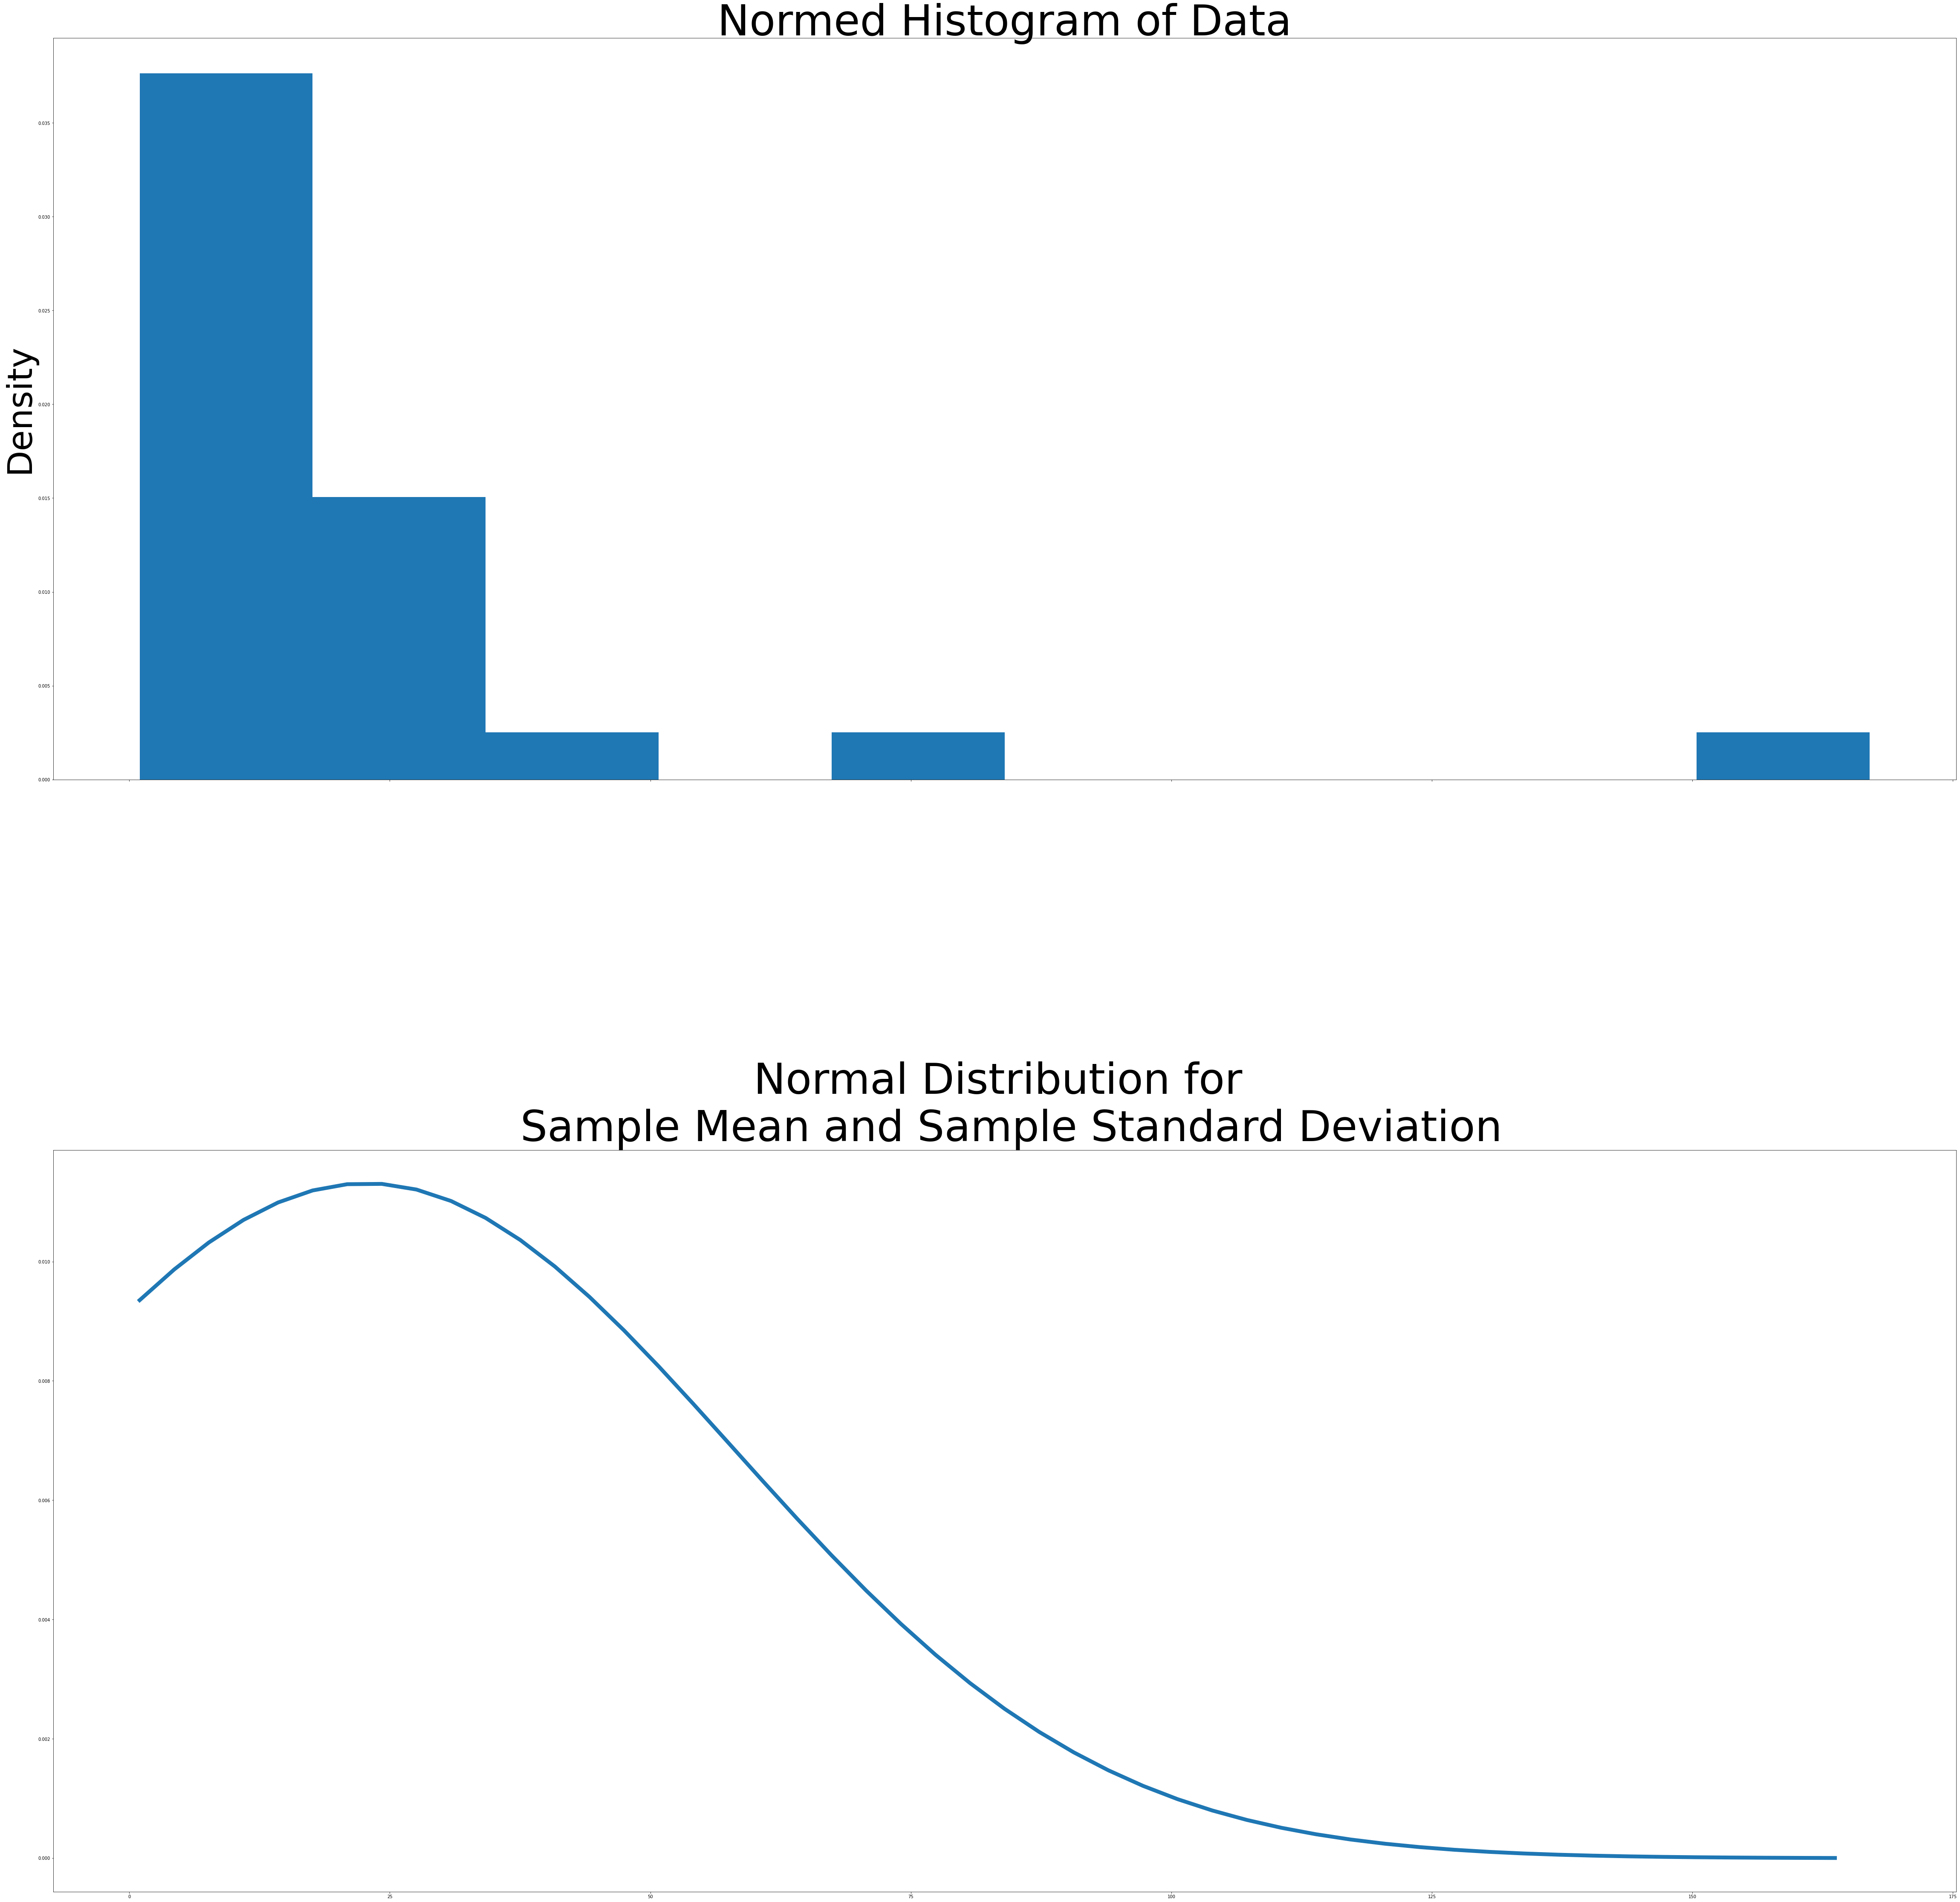

In [74]:
gaussian_one.plot_histogram_pdf()
